In [ ]:
import dask
# import dask.array as da
import numpy as np
# import dask.dataframe as dd
import pandas as pd
import time
import seaborn as sns
import time
from random import random
import dask.array as da
import matplotlib.pyplot as plt

In [8]:

# ##Compute pi without dask

# def pi(n):
    
#     inside = 0     

#     for i in range(n):

#         x, y = random(), random()
#         if x**2 + y**2 < 1:
#             inside += 1
        
#     return inside/n*4

In [164]:
%%time


n=10**4

x, y  = np.random.uniform(low=-1, high = 1, size = n), np.random.uniform(low=-1, high = 1, size = n)
in_circle = len(x[((x**2+y**2)<1)==True])
in_circle/n*4


CPU times: user 1.48 ms, sys: 100 µs, total: 1.58 ms
Wall time: 747 µs


3.1528

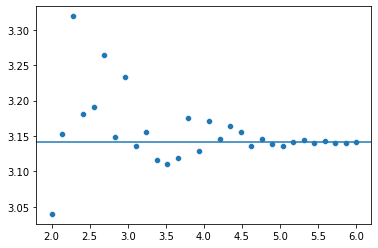

In [77]:
pi
graph = sns.scatterplot(data = pi)
graph.axhline(math.pi)

In [98]:
pi = {}
    for i in range(2,i):
    
        size=int(10**i)

        x = np.random.uniform(low=-1, high = 1, size = (size,2))
        current_pi = len(x[((x[:,0]**2+x[:,1]**2)<1)==True])/len(x[:,0])*4
        pi[i]=current_pi
        plt.figure(figsize = (8,8))
        sns.scatterplot(x=x[:,0], y=x[:,1], hue=(x[:,0]**2+x[:,1]**2)<1,  
                        palette='viridis', legend=False).set(
            title = f'The value of pi is {current_pi} for i of {i}')





In [119]:
# ani = animation.FuncAnimation(fig, animate(7), )
# #                               frames=1,interval=200,repeat=True)
# plt.show()

In [105]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
%matplotlib notebook

In [6]:
from dask.distributed import Client
import os

service_host = os.environ["DASK_SCHEDULER_SERVICE_HOST"]
service_port = os.environ["DASK_SCHEDULER_SERVICE_PORT"]
client = Client(f"{service_host}:{service_port}")

# look at the client and scheduler

client

# you should now be connected to the cluster
# Dashboard link from the client object is clickable but will not route in Domino
# Use the embedded Dask Web UI tab instead

<Client: 'tcp://10.0.46.49:8786' processes=5 threads=30, memory=135.00 GiB>

In [7]:
%%time


n=10**11

x = da.random.uniform(low=-1, high = 1, size = (n,2))

inside_circle = x[((x[:,0]**2+x[:,1]**2)<1)==True]

inside_circle.compute_chunk_sizes()

inside_circle.shape[0]/n*4




CPU times: user 11.6 s, sys: 630 ms, total: 12.2 s
Wall time: 4min 14s


3.14158312964